In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salaries.csv')

In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.shape

(397, 6)

<h2>Overview of data</h2>
<ul>
    <li>Data has 397 rows and 6 columns</li>
    <li>Rank - Categorical Variable - Depicts the rank of the employee</li>
    <li>Discipline - Categorical Variable - Depicts the dsicipline of the employee</li>
    <li>yrs.since.phd - Discrete Variable  - Depicts the years since phd of the employee</li>
    <li>yrs.service - Discrete Variable - Depicts the years of service of the employee</li>
    <li>sex - Categorical Variable - Depicts the sex of the employee</li>
    <li>salary - Outcome - Depicts the salary of the employee</li>
</ul>
<strong>Since we are predicting a continous variable this is a Regression problem</strong>

In [6]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<strong>Data has no null values</strong>

<h2>Exploratory Data Analysis</h2>

<h3>Striplots for categorical variables</h3>

In [7]:
Categorical_vars = ['rank', 'discipline', 'sex']
outcome_var = 'salary'

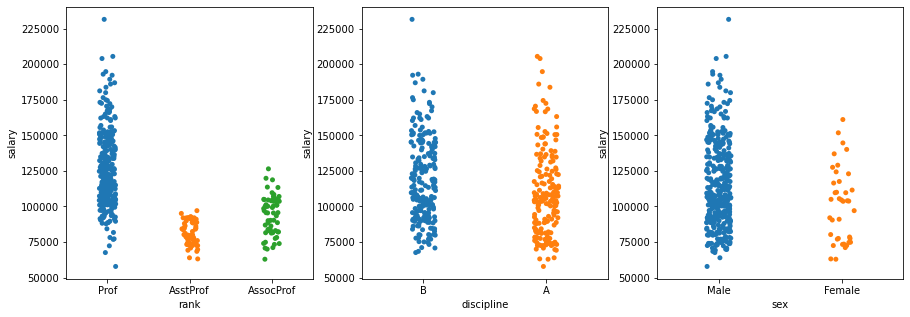

In [8]:
plt.figure(figsize=(15,5))
for i in range(len(Categorical_vars)):
    plt.subplot(1,3, i+1)
    sns.stripplot(x=data[Categorical_vars[i]], y=data[outcome_var])
    
plt.show()

<strong>From above stripplots we can concluse that -: 
        <ul>
            <li>Professors have highest Salaries, while AsstProf have lowest</li>
            <li>Salary in discipline A is a bioot more varied than in discipline B</li>
            <li>Male workers have higher salary than female workers, alos there are a lot more male workers than female workers</li>
        </ul>
</strong>

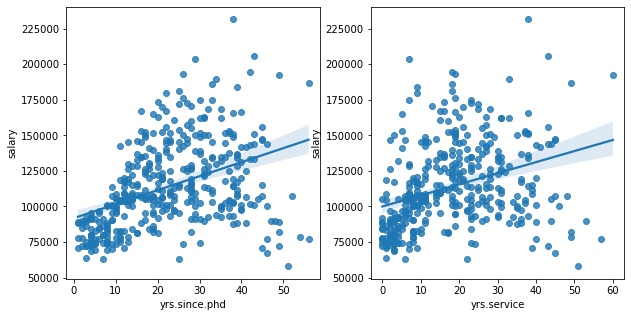

In [9]:
discrete_vars = ['yrs.since.phd','yrs.service']
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.regplot(x =data[discrete_vars[i]], y=data[outcome_var])
    
plt.show()

<strong>From Above scatterplots we can conclude that-:
        <ul>
            <li>Years Since Phd has an upwards trend with Salary</li>
            <li>Years of Service has an upwards trend with Salary</li>
            <li>There Might be some outliers in the years since service column</li>
        </ul>
</strong>

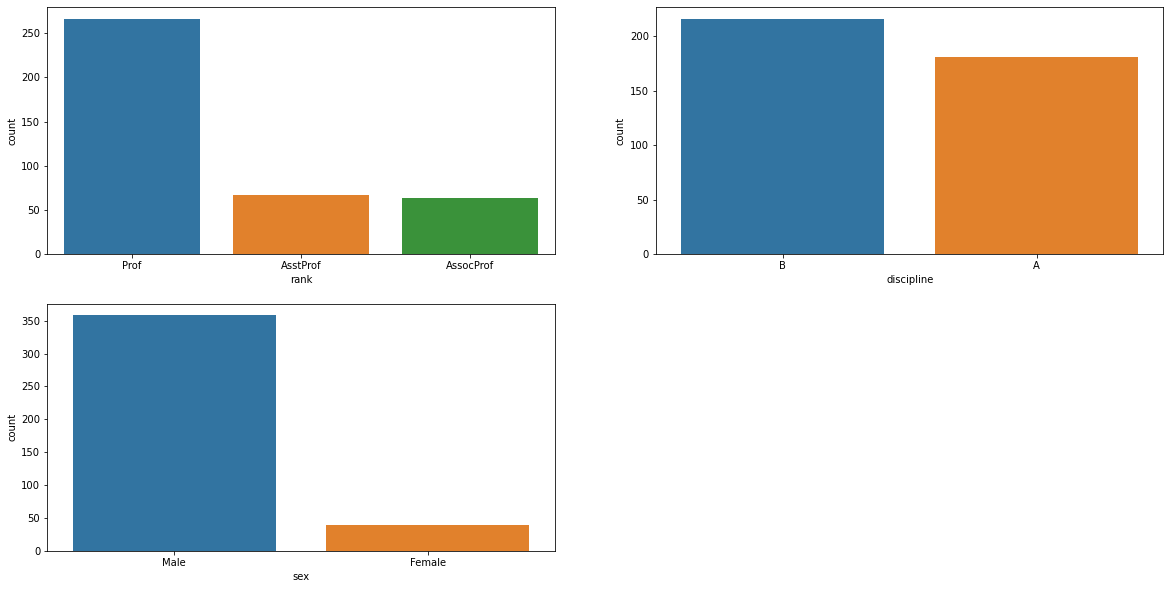

In [12]:
plt.figure(figsize=(20,10))
plotnumber = 1
for col in Categorical_vars:
    plt.subplot(2,2,plotnumber)
    sns.countplot(data[col])
    plotnumber+=1


<strong>From above count plots we can see that there are most number of proessors in the rank column, while the number of AssocProf are lowest. Discipline B has more values than discipline A. The number of Male worksers are fairly more than the number of feamle workers.</strong>


In [14]:
ranklist = ['Prof', 'AsstProf', 'AssocProf']
disciplinelist = ['A', 'B']
sex_list = ['Male', 'Female']

In [32]:
mean_ranks = []
for var in ranklist:
    meanSeriesRank = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 0] == var]
    meanSeriesRank = pd.Series(meanSeriesRank)
    mean_ranks.append(meanSeriesRank.mean())
    
meanRankDataFrame = pd.DataFrame({'Rank':ranklist, 'Mean':mean_ranks})
meanRankDataFrame = meanRankDataFrame.nlargest(3, 'Mean')
meanRankDataFrame

,Rank,Mean
0,Prof,126772.109023
2,AssocProf,93876.437500
1,AsstProf,80775.985075


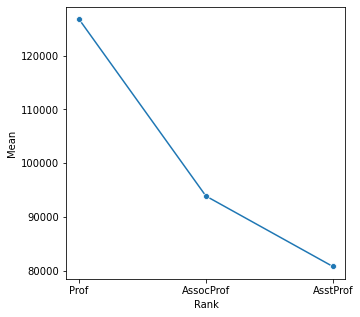

In [33]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Rank', y='Mean', data=meanRankDataFrame,marker='o')

<strong>We can see that there is a difference of about 33000 between Mean Prof Salary and Mean AssoPorf Salary, and a differnece of about 13000 between Mean AssoProf Salary and Mean AsstProf Salary</strong>

In [35]:
mean_sex = []
for var in sex_list:
    meanSexSeries = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 4] == var]
    meanSexSeries = pd.Series(meanSexSeries)
    mean_sex.append(meanSexSeries.mean())
    
meanSexDataFrame = pd.DataFrame({'Sex':sex_list, 'Mean':mean_sex})
meanSexDataFrame = meanSexDataFrame.nlargest(3, 'Mean')
meanSexDataFrame

,Sex,Mean
0,Male,115090.418994
1,Female,101002.410256


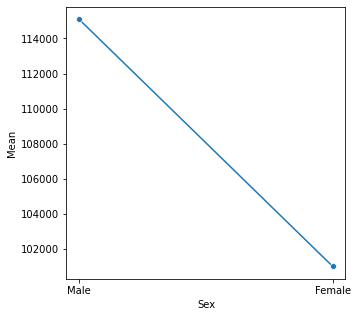

In [37]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Sex', y='Mean', data=meanSexDataFrame,marker='o')

<strong>We can observe that there is s differnece of about 14000 between Mean Male Salary and Mean Female Salary</strong>

In [39]:
mean_dis = []
for var in disciplinelist:
    meanDisSeries = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 1] == var]
    meanDisSeries = pd.Series(meanDisSeries)
    mean_dis.append(meanDisSeries.mean())
    
meanDisDataFrame = pd.DataFrame({'Discipline':disciplinelist, 'Mean':mean_dis})
meanDisDataFrame = meanDisDataFrame.nlargest(3, 'Mean')
meanDisDataFrame

,Discipline,Mean
1,B,118028.694444
0,A,108548.430939


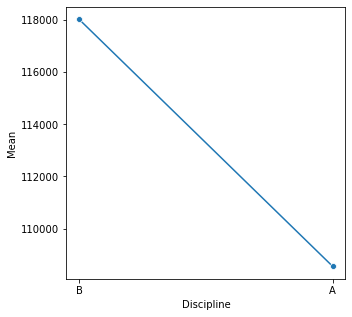

In [41]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Discipline', y='Mean', data=meanDisDataFrame,marker='o')

<strong>We can observe that there is a difference of about 10000 between Mean B Salary and Mean A Salary</strong>

<Figure size 2160x720 with 0 Axes>

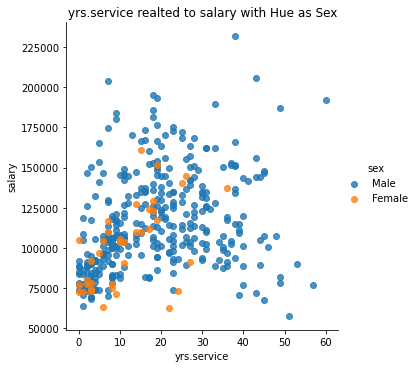

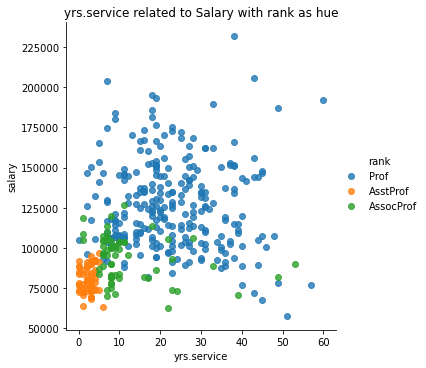

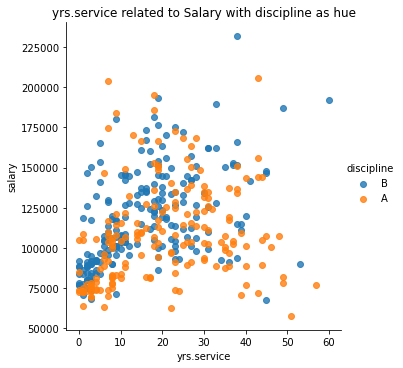

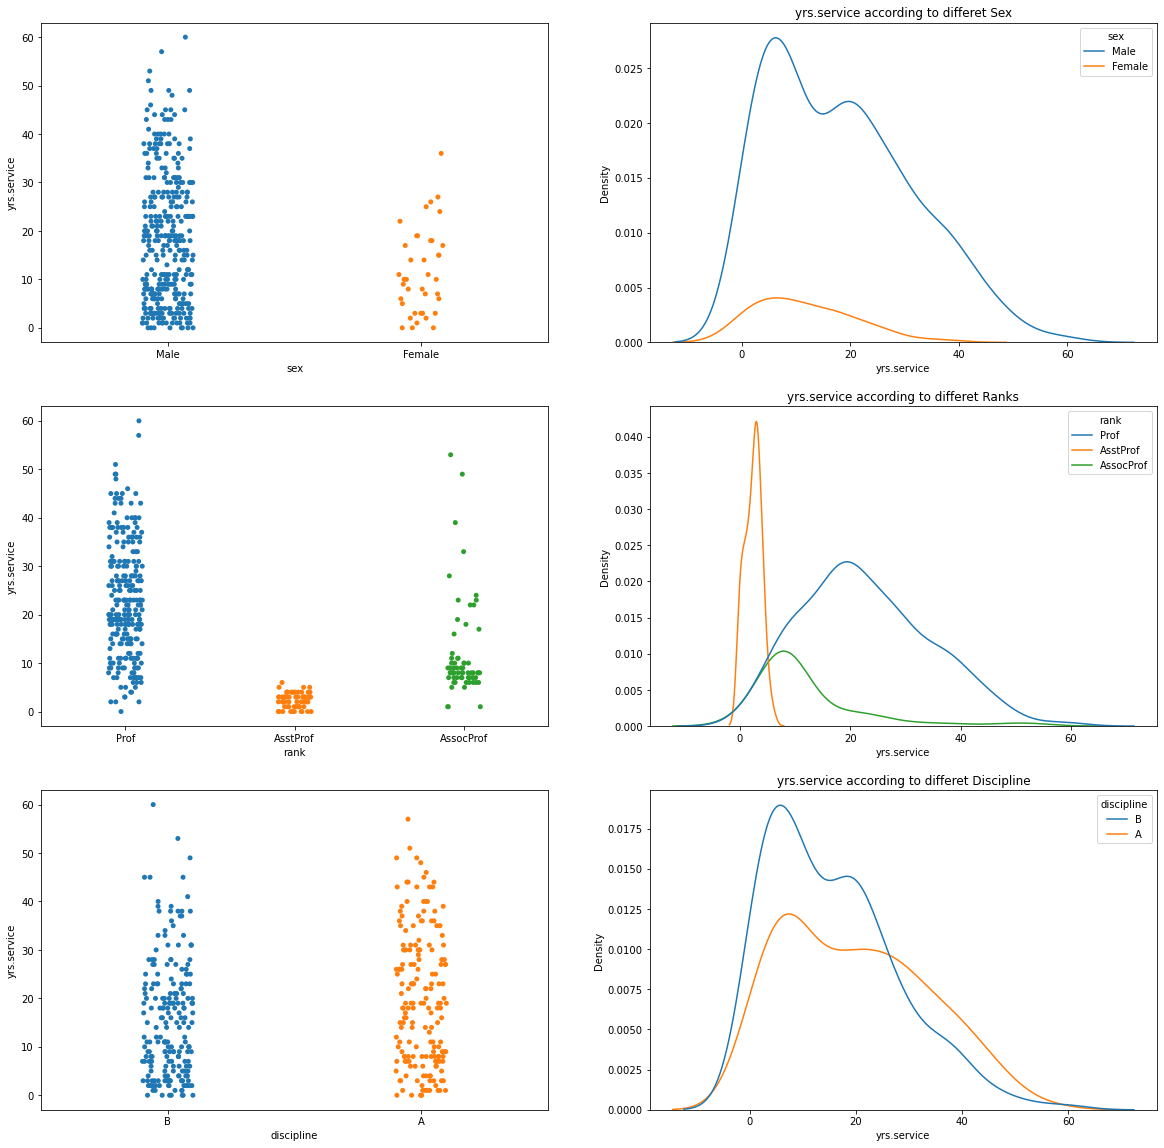

<Figure size 2160x720 with 0 Axes>

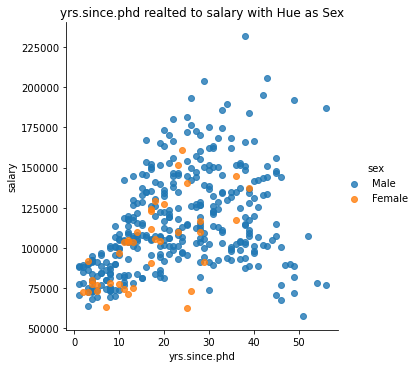

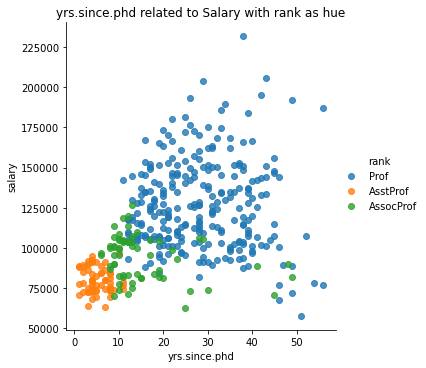

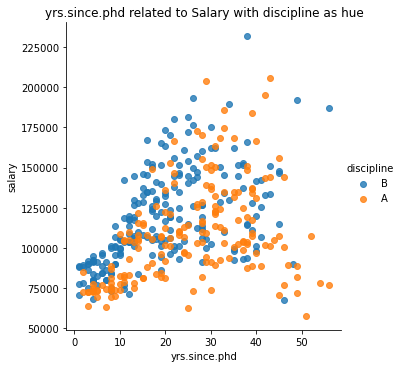

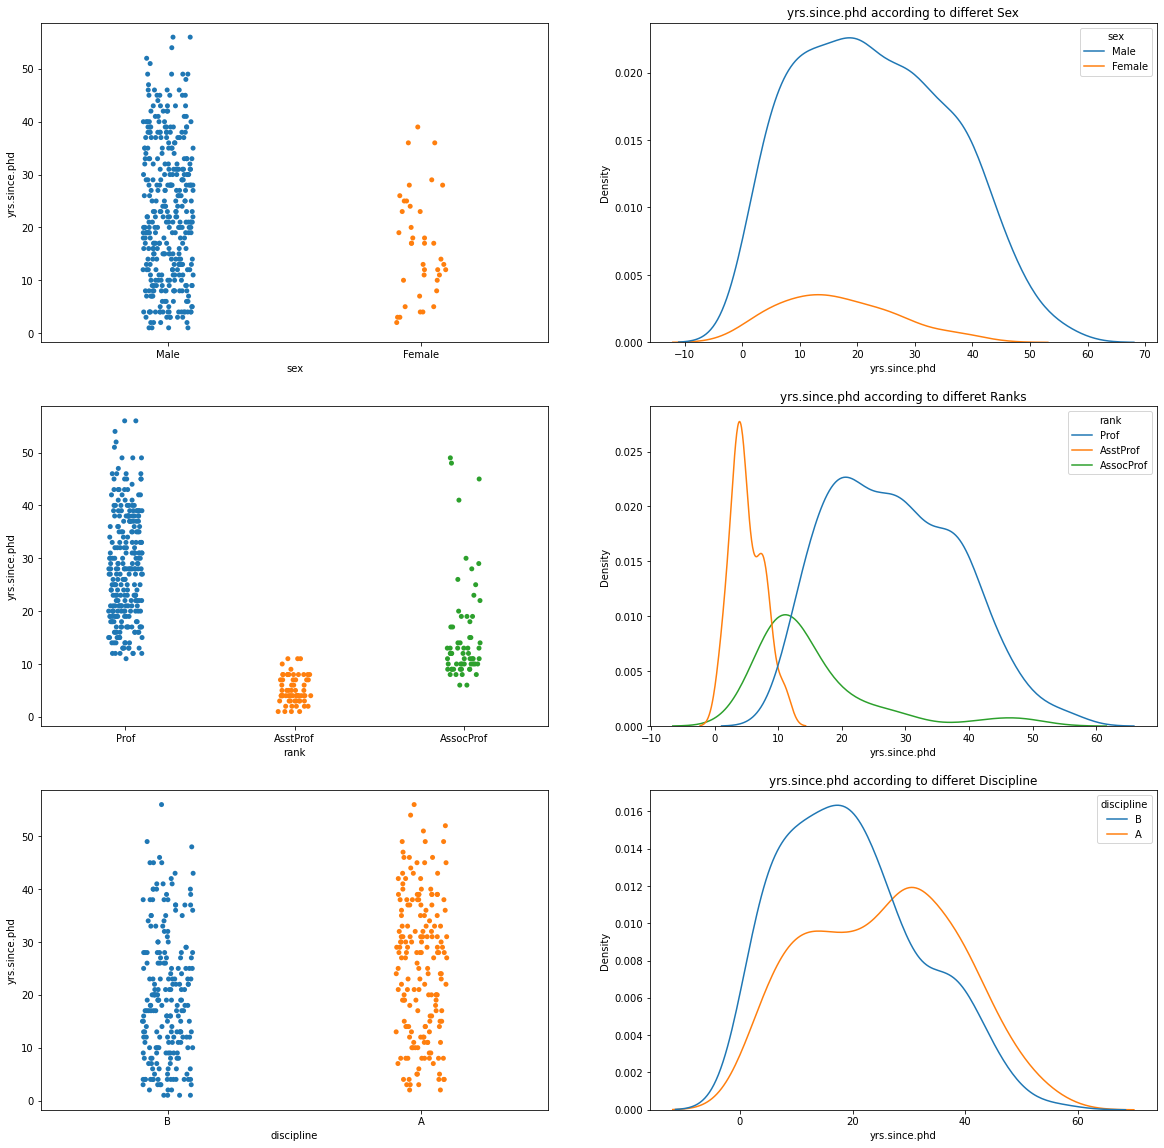

In [65]:
for i,col in enumerate(['yrs.service', 'yrs.since.phd']):
    plt.figure(figsize=(30,10))
    sns.lmplot(y='salary', x=col,data=data, hue='sex',fit_reg=False)
    plt.title(f'{col} realted to salary with Hue as Sex')
    sns.lmplot(y='salary', x=col, data=data, hue='rank', fit_reg=False)
    plt.title(f'{col} related to Salary with rank as hue')
    sns.lmplot(y='salary', x=col, data=data, hue='discipline', fit_reg=False)
    plt.title(f'{col} related to Salary with discipline as hue')
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    sns.stripplot(y=col, x='sex', data=data)
    plt.subplot(3,2,2)
    sns.kdeplot(x=col, hue='sex', data=data)
    plt.title(f'{col} according to differet Sex')
    plt.subplot(3,2,3)
    sns.stripplot(y=col, x='rank', data=data)
    plt.subplot(3,2,4)
    sns.kdeplot(x=col, hue='rank', data=data)
    plt.title(f'{col} according to differet Ranks')
    plt.subplot(3,2,5)
    sns.stripplot(y=col, x='discipline', data=data)
    plt.subplot(3,2,6)
    sns.kdeplot(x=col, hue='discipline', data=data)
    plt.title(f'{col} according to differet Discipline')

<strong>Conclusion from above plots
    <ul>
        <li>Professor usually have more salaries than other ranks.</li>
        <li>Professors have more yrs of service compared to Assocaite Prfessor, which is true as associate professors later get promoted to Professors.</li>
        <li>Discipline A has less years of service on average than discipline B, but has more yrs since phd than discipline B.</li>
    </ul>
</strong>

<strong>Pairplot</strong>

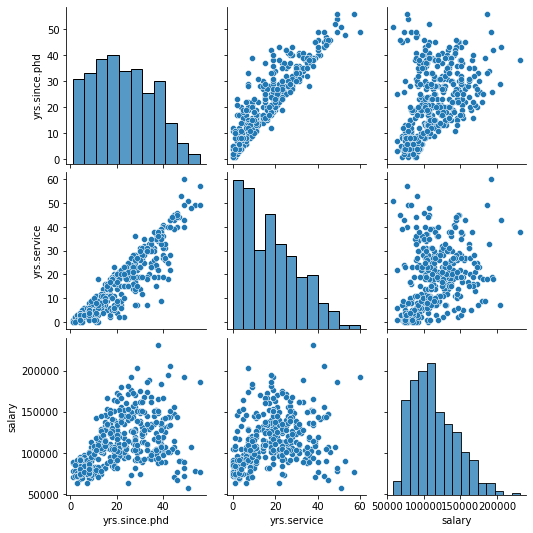

In [66]:
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

<strong>We can see that yrs.service and yrs.since.phd have high correlaion with each other. This will be handled later using VIF for mulitcollinearity</strong>

<h3>Correlation Matrix</h3>

In [67]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<h3>Correlation Heatmap</h3>

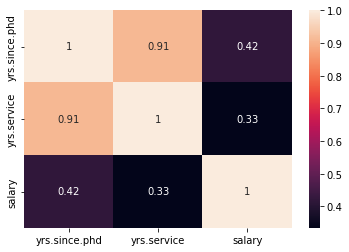

In [68]:
sns.heatmap(data.corr(), annot=True)

<strong>Outcome of Correlation Matrix
    <ul>
        <li>Yrs.Since.phd has correlation of 42% with salary</li>
        <li>yrs.service has correlation of 33% with salary</li>
        <li>yrs.service has correlation of 91% with salary</li>
    </ul>
</strong>

In [71]:
data = data.drop(columns=['breakYrs'])

<h3>Descriptive Statistics</h3>

In [72]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


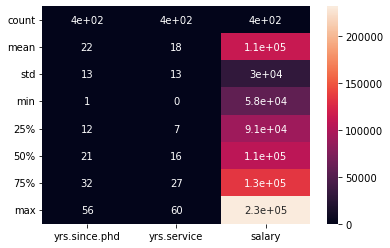

In [73]:
sns.heatmap(data.describe(), annot=True)

<strong>Outcome of descriptive Statistice
    <ul>
        <li>Years Since Phd
            <ul>
                <li>Mean - 22.31</li>
                <li>STD - 12.88</li>
                <li>Min - 1.00</li>
                <li>Max - 56.00</li>
            </ul>
        </li>
        <li>Years of Service
            <ul>
                <li>Mean - 17.61</li>
                <li>STD - 13.00</li>
                <li>Min - 0.00</li>
                <li>Max - 60.00</li>
            </ul>
        </li>
        <li>Salary
            <ul>
                <li>Mean - 113706</li>
                <li>STD - 30289</li>
                <li>Min - 57800</li>
                <li>Max - 231545</li>
            </ul>
        </li>
    </ul>
</strong>

<h3>Looking for outliers using boxplot</h3>

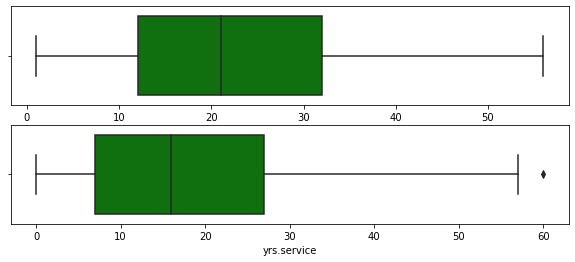

In [81]:
plt.figure(figsize=(10,4))
for i, col in enumerate(discrete_vars):
    plt.subplot(2,1, i+1)
    sns.boxplot(data[col], color='green',orient='v')
    
plt.show()

<strong>Our data is fairly clean expect one outlier in yrs.service</strong>

In [83]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<strong>Yrs.service Column is lightly skewed</strong>

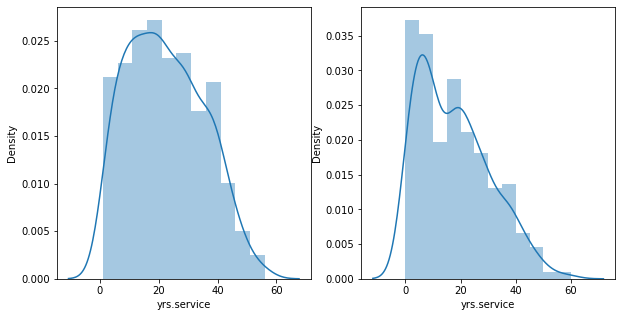

In [84]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =data[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<strong>Above plots confirm our intiution about skew of yrs.service column</strong>

<h3>Treating outliers</h3>

<h4>Z-score technique</h4>

In [85]:
to_apply_z_df = data.drop(columns=['salary'])
to_apply_z_df

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [87]:
from scipy.stats import zscore
z = np.abs(zscore(to_apply_z_df.iloc[:, 2:4]))
z.shape

(397, 2)

In [88]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])
data_new.isnull().sum()

Old Shape (397, 6)
New Shape (395, 6)
Total Dropped Rows 2


rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<h4>Trying to remove skewness using log transformation</h4>

In [89]:
x = data_new.drop(columns=['salary'])
y = data_new['salary']
print(x.shape)
print(x.mean())
print(x.isnull().sum())

(395, 5)
yrs.since.phd    22.162025
yrs.service      17.407595
dtype: float64
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64


In [92]:
x_logged = pd.DataFrame()
x_logged['yrs.service'] = np.log1p(x['yrs.service'])
x_logged['yrs.since.phd'] = np.log1p(x['yrs.since.phd'])
x_logged.skew()

yrs.service     -0.837925
yrs.since.phd   -0.911403
dtype: float64

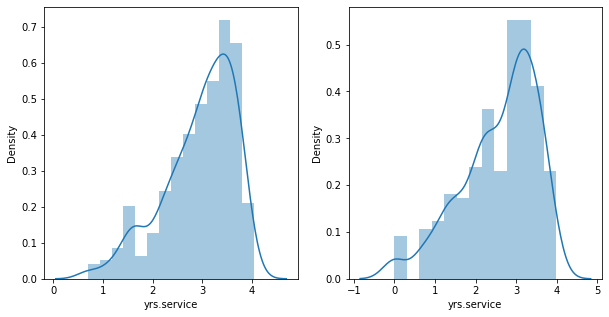

In [93]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x_logged[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<strong>Log Transformation does not help in removing skew</strong>

<h4>Trying to remove skewness using Square Root Transformation</h4>

In [95]:
x_sqrt = pd.DataFrame()
x_sqrt['yrs.service'] = np.sqrt(x['yrs.service'])
x_sqrt['yrs.since.phd'] = np.sqrt(x['yrs.since.phd'])
x_sqrt.skew()

yrs.service     -0.191086
yrs.since.phd   -0.293387
dtype: float64

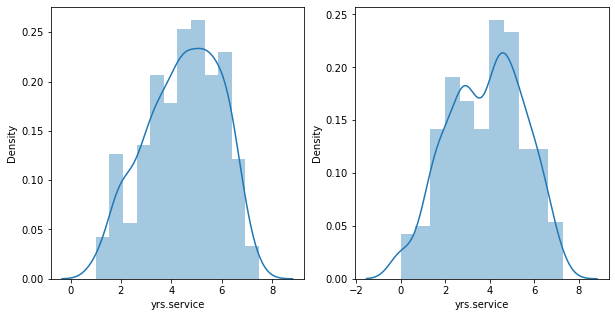

In [96]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x_sqrt[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<strong>Square Root Transformation has done a good job in removing skew</strong>

<h4>Trying to remove skewness using Yes-johnson transformation</h4>

In [99]:
from sklearn.preprocessing import power_transform
x_yeo = pd.DataFrame()
x_yeo['yrs.service'] = power_transform(np.array(x.iloc[:,3]).reshape(-1,1), method='yeo-johnson').reshape(395,)
x_yeo['yrs.since.phd'] = power_transform(np.array(x.iloc[:,2]).reshape(-1,1), method='yeo-johnson').reshape(395,)
x_yeo.skew()

yrs.service     -0.130427
yrs.since.phd   -0.136796
dtype: float64

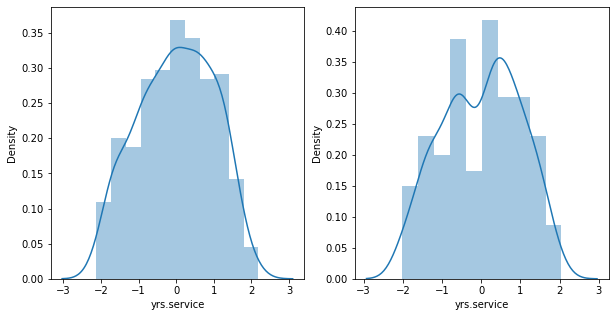

In [100]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x_yeo[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<strong>Yeo-Johnson Transformation has done the best in removing skew</strong>

<strong><h3>Applying yeo-johnson as final transformation</h3></strong>

In [102]:
x['yrs.service'] = power_transform(np.array(x.iloc[:,3]).reshape(-1,1), method='yeo-johnson').reshape(395,)
x['yrs.since.phd'] = power_transform(np.array(x.iloc[:,2]).reshape(-1,1), method='yeo-johnson').reshape(395,)
x.skew()

yrs.since.phd   -0.136796
yrs.service     -0.130427
dtype: float64

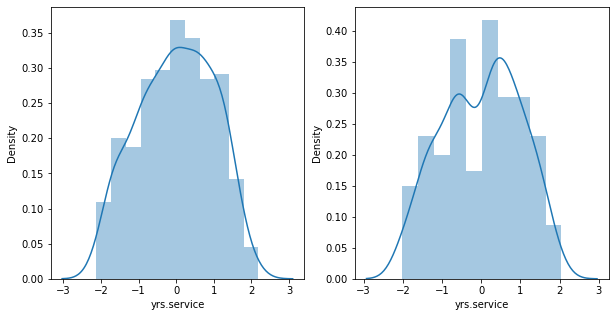

In [103]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<h3>Scaling the data Using Standard scaler</h3>

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x['yrs.service'] = sc.fit_transform(np.array(x.iloc[:,3]).reshape(-1,1))
x['yrs.since.phd'] = sc.transform(np.array(x.iloc[:,2]).reshape(-1,1))
x.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64

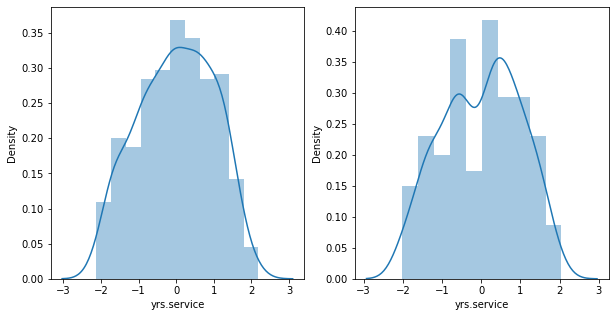

In [105]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

In [106]:
x.mean()

yrs.since.phd    3.957453e-16
yrs.service     -3.597685e-17
dtype: float64

<strong>Data now follows a close to normal distribution, with mean around zero</strong>

<h3>
    Encoding categorical variables using get_dummies
</h3>

In [107]:
x = pd.get_dummies(x)
x

,yrs.since.phd,yrs.service,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,-0.121228,0.259854,0,0,1,0,1,0,1
1,-0.042467,0.112315,0,0,1,0,1,0,1
2,-1.625934,-1.287705,0,1,0,0,1,0,1
3,1.591760,1.449089,0,0,1,0,1,0,1
4,1.301965,1.540959,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,0.870701,0.998921,0,0,1,1,0,0,1
393,0.740983,0.330280,0,0,1,1,0,0,1
394,1.419524,0.715524,0,0,1,1,0,0,1
395,0.330379,0.034786,0,0,1,1,0,0,1


<strong><h3>Checking for multicollinearity using VIF</h3></strong>

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.107691,yrs.since.phd
1,5.817192,yrs.service
2,inf,rank_AssocProf
3,inf,rank_AsstProf
4,inf,rank_Prof
5,inf,discipline_A
6,inf,discipline_B
7,inf,sex_Female
8,inf,sex_Male


<strong>Yrs since phd has highest VIF we can drop this column</strong>

In [109]:
x = x.drop(columns=['yrs.since.phd'])

In [110]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.095024,yrs.service
1,inf,rank_AssocProf
2,inf,rank_AsstProf
3,inf,rank_Prof
4,inf,discipline_A
5,inf,discipline_B
6,inf,sex_Female
7,inf,sex_Male


<b>VIF is now below 5 so we can build our mdoels now</b>

<h3>Linear Regression Model</h3>

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)

In [187]:
lr = LinearRegression()
params = {'fit_intercept':[True, False],
          'normalize':[True, False],
          'positive':[True, False],
         }
grid = GridSearchCV(estimator = lr, param_grid=params, scoring='r2', n_jobs=-1,return_train_score=True, cv=None)

grid.fit(X_train, Y_train)
print("Best Params : " ,grid.best_params_)
print("Best Score : ", grid.best_score_)

Best Params :  {'fit_intercept': False, 'normalize': True, 'positive': True}
Best Score :  0.39336830173483894


Builind model with best params

In [220]:
lr_optimal = LinearRegression(fit_intercept=False, normalize=True, positive=True)
lr_optimal.fit(X_train, Y_train)
y_pred_train = lr_optimal.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = lr_optimal.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.34327089166254643
Training Mean Absolute Error : 16710.20312378392
Training Mean Squared Error : 522056791.4309794
Training Root Mean Squared Error:  22848.562130492573
Testing R2 Score : 0.00544202121259052
Testing Mean Absolute Error : 15840.31864247001
Testing Mean Squared Error : 405047163.4408759
Testing Root Mean Squared Error:  20125.783548495096


<strong>This model performs very poorly</strong>

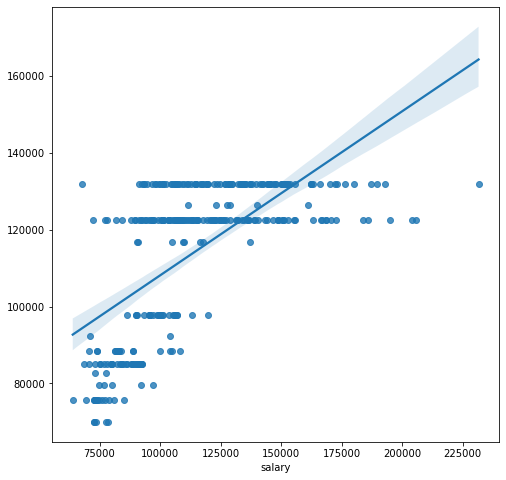

In [221]:
plt.figure(figsize=(8,8))
sns.regplot(Y_train, y_pred_train)

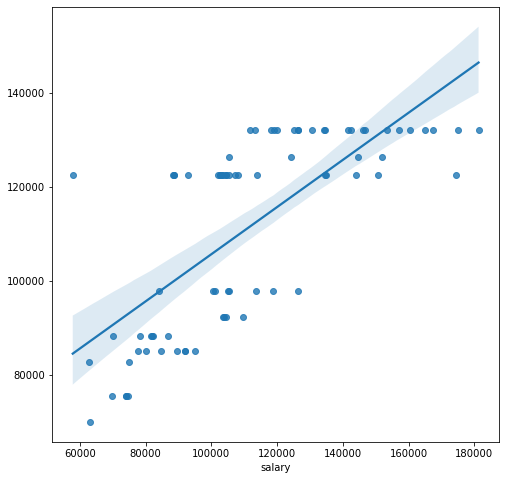

In [222]:
plt.figure(figsize=(8,8))

sns.regplot(Y_test, y_pred_test)

<h3>Lasso Reg Model</h3>

In [142]:
from sklearn.linear_model import Lasso

In [143]:
lass = Lasso()

In [155]:
params_lasso = {'alpha':np.arange(40,60,2),
          'fit_intercept':[True, False],
          'normalize':[True, False],
          'max_iter':np.arange(1000,10000, 1000),
          'precompute':[True, False],
#           'warm_start':[True, False],
#           'positive':[True, False],
#           'tol':np.arange(0.000001, 0.1, 0.00001),
          'selection':['random', 'cyclic']
         }
grid_lass = GridSearchCV(estimator=lass, param_grid=params_lasso, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_lass.fit(X_train, Y_train)
print("Best Params : " ,grid_lass.best_params_)
print("Best Score : ", grid_lass.best_score_)

Best Params :  {'alpha': 48, 'fit_intercept': True, 'max_iter': 4000, 'normalize': True, 'precompute': True, 'selection': 'random'}
Best Score :  0.3933827437069682


Builind model with best params

In [223]:
lass_optimal=Lasso(alpha=48, fit_intercept=True, max_iter=4000, normalize=True, precompute=True, selection='random')
lass_optimal.fit(X_train, Y_train)
y_pred_train = lass_optimal.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = lass_optimal.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.5197728073667125
Training Mean Absolute Error : 16835.582584967608
Training Mean Squared Error : 524293686.5543327
Training Root Mean Squared Error:  22897.460264281115
Testing R2 Score : -0.16431795963965157
Testing Mean Absolute Error : 16291.074973661585
Testing Mean Squared Error : 420432679.2662967
Testing Root Mean Squared Error:  20504.455107763693


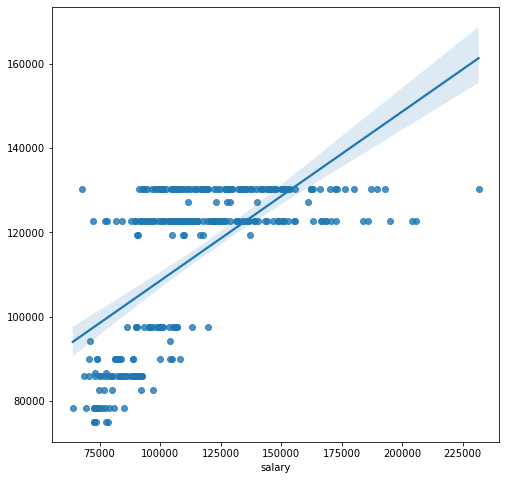

In [224]:
plt.figure(figsize=(8,8))
ax =sns.regplot(Y_train, y_pred_train)

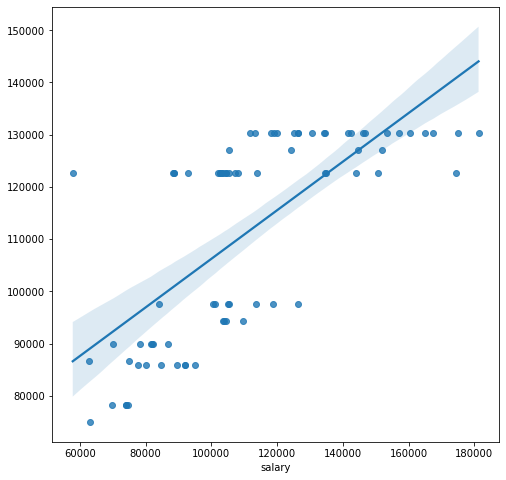

In [225]:
plt.figure(figsize=(8,8))
sns.regplot(Y_test, y_pred_test)

<strong>This model also does not perform very well</strong>

<h3>Rideg Reg Model</h3>

In [159]:
from sklearn.linear_model import Ridge

In [161]:
ridge = Ridge()
params_ridge= {
    'alpha':np.arange(1e-03, 0.1, 3e-02),
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'max_iter':np.arange(1000,10000, 1000),
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_ridge.fit(X_train, Y_train)
print("Best Params : " ,grid_ridge.best_params_)
print("Best Score : ", grid_ridge.best_score_)

Best Params :  {'alpha': 0.031, 'fit_intercept': True, 'max_iter': 3000, 'normalize': True, 'solver': 'sag'}
Best Score :  0.38819287481744214


In [226]:
ridge = Ridge(alpha = .031, fit_intercept=True, max_iter=3000, normalize=True, solver='sag')
ridge.fit(X_train, Y_train)
y_pred_train = ridge.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = ridge.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.39115783529197734
Training Mean Absolute Error : 16711.679375678174
Training Mean Squared Error : 522239413.3167767
Training Root Mean Squared Error:  22852.558135070496
Testing R2 Score : -0.03671027014194661
Testing Mean Absolute Error : 15908.825931053034
Testing Mean Squared Error : 407614087.38509125
Testing Root Mean Squared Error:  20189.454856065116


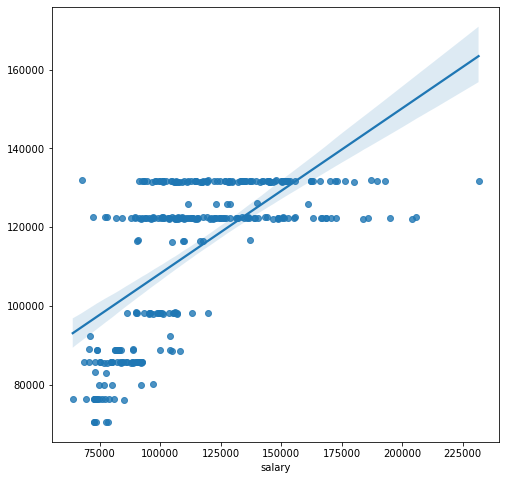

In [227]:
plt.figure(figsize=(8,8))
ax =sns.regplot(Y_train, y_pred_train)

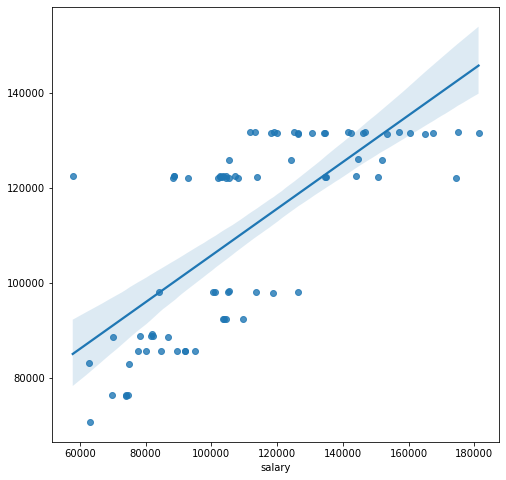

In [228]:
plt.figure(figsize=(8,8))
sns.regplot(Y_test, y_pred_test)

<strong>This model does jsut a little better than other two models</strong>

<h3>KNeighbors REgressor Model</h3>

In [195]:
from sklearn.neighbors import KNeighborsRegressor

In [197]:
knn = KNeighborsRegressor()
params_knn = {
    'n_neighbors' : [12,13,14,15,16],
    'weights':['uniform', 'distance'],
    'p':[1,2],
    'leaf_size':[2,3],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs':[-1]
}
grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_knn.fit(X_train, Y_train)
print("Best Params : " ,grid_knn.best_params_)
print("Best Score : ", grid_knn.best_score_)

Best Params :  {'algorithm': 'brute', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
Best Score :  0.32530363616545144


In [229]:
knn = KNeighborsRegressor(algorithm='brute', leaf_size=2, n_jobs=-1, n_neighbors=13, p=1, weights='uniform')
knn.fit(X_train,Y_train)
y_pred_train = knn.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = knn.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.18790161861466737
Training Mean Absolute Error : 16475.03602726387
Training Mean Squared Error : 503006910.4549097
Training Root Mean Squared Error:  22427.81555245427
Testing R2 Score : -0.008668737453854103
Testing Mean Absolute Error : 15685.669912366115
Testing Mean Squared Error : 404646952.92674696
Testing Root Mean Squared Error:  20115.83836002733


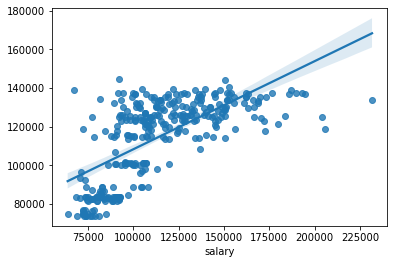

In [230]:
sns.regplot(Y_train, y_pred_train)

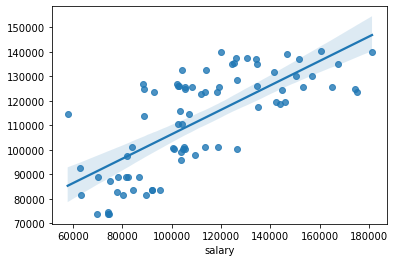

In [231]:
sns.regplot(Y_test, y_pred_test)

<strong>This model performs much better than all the other models</strong>

<h3>SVM Regressor</h3>

In [202]:
from sklearn.svm import SVR

In [211]:
svr=SVR()
param_svr = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2],
    'gamma':['scale', 'auto'],
    'coef0':[-2,-3,-4,-1],
    'C':np.arange(7000,10000,200),
    'shrinking':[True, False],
    'epsilon':[1e-12, 1e-10,1e-11],
    'max_iter':[2000,3000,4000]
}
grid_svr = GridSearchCV(estimator=svr, param_grid=param_svr, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_svr.fit(X_train, Y_train)
print("Best Params : " ,grid_svr.best_params_)
print("Best Score : ", grid_svr.best_score_)

Best Params :  {'C': 7200, 'coef0': -2, 'degree': 1, 'epsilon': 1e-12, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 2000, 'shrinking': False}
Best Score :  0.3690602364751623


Building Mdoel with best params

In [213]:
svr = SVR(C=7200, coef0=-2, degree=1, epsilon=1e-12, gamma='scale', kernel='linear', max_iter=2000, shrinking=False)
svr.fit(X_train, Y_train)
y_pred_train = svr.predict(X_train)
print("Training Score:", r2_score(Y_train, y_pred_train))
print("Training MEan Squared Error:", mean_squared_error(Y_train, y_pred_train))
print("Training Mean Absolute Error:", mean_absolute_error(Y_train, y_pred_train))
print("Trainig Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_train, y_pred_train)))

y_pred_test = svr.predict(X_test)
print("Testing Score:", r2_score(Y_test, y_pred_test))
print("Testing MEan Squared Error:", mean_squared_error(Y_test, y_pred_test))
print("Testing Mean Absolute Error:", mean_absolute_error(Y_test, y_pred_test))
print("Testing Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, y_pred_test)))

Training Score: 0.4064129681742257
Training MEan Squared Error: 540581336.9996316
Training Mean Absolute Error: 16511.73832592532
Trainig Root Mean Squared Error: 23250.405093237227
Testing Score: 0.546467877309843
Testing MEan Squared Error: 387339694.3521817
Testing Mean Absolute Error: 14664.058158068263
Testing Root Mean Squared Error: 19680.947496301636


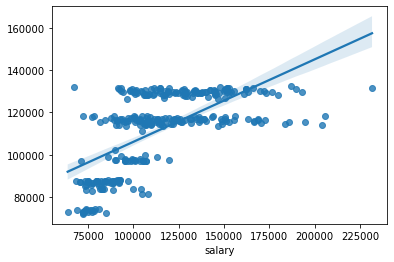

In [218]:
sns.regplot(Y_train,y_pred_train)

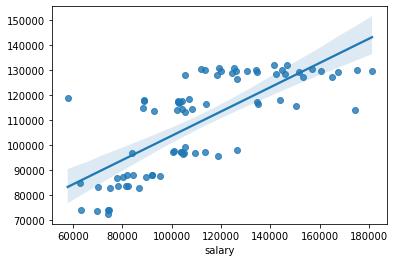

In [219]:
sns.regplot(Y_test, y_pred_test)

<strong>SVR Model is the best performing model until now</strong>

In [233]:
from xgboost import XGBRegressor

In [239]:
xgb = XGBRegressor()
params_xgb = {
    'n_estimators':[12,13,14,15,16,17],
    'learning_rate':np.arange(0.0001, 1.0, 0.05),
    'booster':['gbtree', 'gblinear', 'dart'],
    'n_jobs':[-1]
}
grid_kgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, n_jobs=-1, cv=3, scoring='r2')
grid_kgb.fit(X_train, Y_train)
print("Best Params : " ,grid_kgb.best_params_)
print("Best Score : ", grid_kgb.best_score_)

Best Params :  {'booster': 'gblinear', 'learning_rate': 0.6001000000000001, 'n_estimators': 15, 'n_jobs': -1}
Best Score :  0.41275270698977246


Building Model with best Params

In [240]:
xgb = XGBRegressor(booster='gblinear', learning_rate=0.6, n_estimators=15, n_jobs=-1)
xgb.fit(X_train, Y_train)
y_pred_train = xgb.predict(X_train)
print("Training Score:", r2_score(Y_train, y_pred_train))
print("Training MEan Squared Error:", mean_squared_error(Y_train, y_pred_train))
print("Training Mean Absolute Error:", mean_absolute_error(Y_train, y_pred_train))
print("Trainig Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_train, y_pred_train)))

y_pred_test = xgb.predict(X_test)
print("Testing Score:", r2_score(Y_test, y_pred_test))
print("Testing MEan Squared Error:", mean_squared_error(Y_test, y_pred_test))
print("Testing Mean Absolute Error:", mean_absolute_error(Y_test, y_pred_test))
print("Testing Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, y_pred_test)))

Training Score: 0.4263100539746826
Training MEan Squared Error: 522461006.42009765
Training Mean Absolute Error: 16699.78441455696
Trainig Root Mean Squared Error: 22857.40594249701
Testing Score: 0.5215212587805638
Testing MEan Squared Error: 408645386.08342195
Testing Mean Absolute Error: 15869.841574367088
Testing Root Mean Squared Error: 20214.979250135824


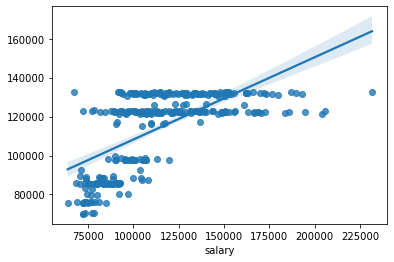

In [241]:
sns.regplot(Y_train,y_pred_train)

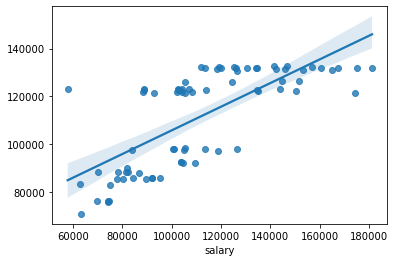

In [242]:
sns.regplot(Y_test, y_pred_test)

<strong>SVR Model is the best performimg model</strong>

In [243]:
import pickle
filename = 'final_model.pickle'

pickle.dump(svr, open(filename, 'wb'))

In [244]:
svr.coef_

array([[  1760.40171708,  -7360.0215914 , -15894.33837055,
         23254.35996195,  -6943.36474679,   6943.36474679,
          -279.87930174,    279.87930174]])